[Slides](https://)

# Statistical Theory Final Project Analysis

---

Names of Group Members:

-  Diego Garza Valdez
-  Adam Giacalone
-  Dylan O'Meara




# UFO Sightings by Different Seasons and Countries

---




# Introduction

---

Give a brief overall description of the data set and your project. The goal of this section is to explain your motivation behind why you chose the data, what information is in the data set, what questions are you going to investigate in your analysis, and other background information that would be useful for the reader before moving into your analysis. Below are some questions to consider:

<br>

## Background:

---

We are going to analyze a data set on UFO sighting across the globe.  This data includes a very large number of observed UFO sightings that we imported from [kaggle](https://www.kaggle.com/datasets/willianoliveiragibin/ufo-sightings).  This is a very recent data set, being uploaded to kaggle in November 2023, with the authors Jon Wright and Willian Oliveira.  We chose this data set simply because it was high up under the 'trending' data sets tab on kaggle,  this data set is very extensive with the number of observations in the data set, and overall it looked like a pretty fun dataset to analyze.  Diego put the dataset into github and converted the data into a csv file, from which he then copied the url of the raw data, and using the `read.cvs()` command in R, we were able to import the data into colab.  The statisitical questions were are going to investigate are whether or not there is a difference in the length of UFO sightings depending on season, and is there is a difference in the proportions of described UFO shapes in different countires.

<br>

## Structure of the Data:

---

There are just over 80,000 observations in this data set.  Each observation corresponds to a supposed UFO encounter.  There are 17 variables total in this data set, however we will only be focusing on four of them for this project.  Our variables of interest are:
- `Season`:  The season in which the observation was recorded (Summer, Autumn, Winter, and Spring).
- `Country`: The country in which the UFO was seen in (United States, United Kingdom, Canada, etc...)
- `UFO_shape`: The shape of which the UFO was described (light, circle, triangle, etc...)
- `length_of_encounter_seconds`:  The length of time the encounter took place, in seconds.

Thankfully, there are not many issues with the data such as missing values.  However, the main issue is that a total of 10 variables (such as `Season`, `Country`, and `UFO_shape`)  are stored as characters, when they should be stored as categorical data, and thus will need to be converted.  Another possible issue could be data such as `Year` and `Month` being stored as integers and thus quantitative data, when they should be stored as categorical.  However, we will not be exploring any of the variables that are of integer type, so we will not need to convert these variables.  We will also not be focusing on most of the variables stored as characters, so we will only have to convert the
previously mentioned categorical variables of interest.




**Cleaning Data of Interest and Initial Importing:**

First, we extract only the four variables of interest into a new data frame called ufo.

In [ ]:
data.ufo <- read.csv("https://raw.githubusercontent.com/Diego150103/Project-Stat/main/ufo-sightings-transformed.csv")

In [ ]:
summary(data.ufo)

       X          Date_time         date_documented         Year     
 Min.   :    0   Length:80328       Length:80328       Min.   :1906  
 1st Qu.:20082   Class :character   Class :character   1st Qu.:2001  
 Median :40164   Mode  :character   Mode  :character   Median :2006  
 Mean   :40164                                         Mean   :2004  
 3rd Qu.:60245                                         3rd Qu.:2011  
 Max.   :80327                                         Max.   :2014  
     Month             Hour          Season          Country_Code      
 Min.   : 1.000   Min.   : 0.00   Length:80328       Length:80328      
 1st Qu.: 4.000   1st Qu.:10.00   Class :character   Class :character  
 Median : 7.000   Median :19.00   Mode  :character   Mode  :character  
 Mean   : 6.835   Mean   :15.53                                        
 3rd Qu.: 9.000   3rd Qu.:21.00                                        
 Max.   :12.000   Max.   :23.00                                        
   Cou

In [ ]:
ufo <- data.ufo[ , c("Season", "Country", "UFO_shape", "length_of_encounter_seconds")]

Next, we convert the variables `Season`, `UFO_shape`, and `Country`  from characters to `factors`.  We also shorten the  categorical variables to have a fewer number of possible categories, as to better focus on only the data we are interested in.  The cleaned data of interest is stored in a new data frame `ufo`, and the summary is printed to the screen.

In [ ]:
ufo$Season <- factor(ufo$Season, levels = c("Summer", "Autumn"))
ufo$UFO_shape <- factor(data.ufo$UFO_shape, levels = c("Light", "Triangle", "Circle", "Fireball", "Unknown"))
ufo$Country <- factor(data.ufo$Country, levels = c("Mexico", "United States"))
summary(ufo)

    Season               Country         UFO_shape    
 Summer:26307   Mexico       :  225   Light   :16565  
 Autumn:21735   United States:70878   Triangle: 7865  
 NA's  :32286   NA's         : 9225   Circle  : 7607  
                                      Fireball: 6208  
                                      Unknown : 5584  
                                      NA's    :36499  
 length_of_encounter_seconds
 Min.   :       0           
 1st Qu.:      30           
 Median :     180           
 Mean   :    9017           
 3rd Qu.:     600           
 Max.   :97836000           

# Exploratory Data Analysis

------------------------------------------------------------------------

Exploratory data analysis on the variable(s) involved in the two statistical questions you will analyze more formally in the next two sections. The goal is to visualize interesting patterns or results that you will explore more in depth by performing hypothesis tests, and interpret/explain what information in the plots is relevant to your analysis.

**Provide at least three relevant data visualizations.**

- At least one plot should compare BOTH variables involved in your hypotheses for a difference in two means.
- At least one plot should comp compare BOTH variables involved in your hypotheses for a difference in two proportions.
- Include at least one more plot of your choice that relates to one or both of your questions. You can decide what and how many other plots you would like to include.
- Be sure to provide a practical interpretation for each of the plots you create.
  - What interesting questions do the plots raise?
  - What conclusions might we expect to draw?
  - How did the plots help you determine what statistical questions you decided to test?



***Exploratory Data Analysis 1:*** Exploring the `length_of_encounter_seconds` variable.

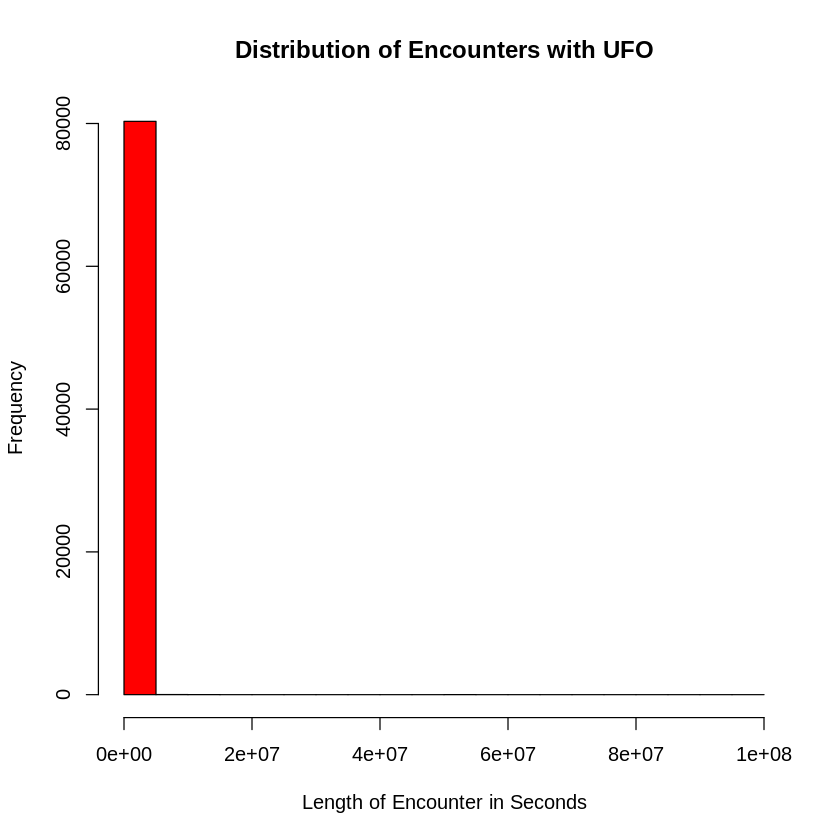

In [ ]:
hist(ufo$length_of_encounter_seconds,
     main = "Distribution of Encounters with UFO",
     xlab = "Length of Encounter in Seconds",
     ylab = "Frequency",
     col = "red",
     breaks = 20)

The above histogram is the length of encounters with a UFO in seconds from every encounter in the data set.  However, we can see that this histogram is not very useful looking, as all of the data is inside a single break to the left.  This is because this is an incredibly wide set of data, with some entries being 0.01 seconds, and others being around 100,000,000 seconds, or just over three years.  This will be fixed in multiple histograms below.


By creating a boxplot, we can see that our data is being heavily influenced by some outliers. Sorting the data by length and looking at the maximum and the preceeding 100 values of our data set, we can see that some of these encounters have lasted years. So we seperate the data by creating 4 vectors from 0 to 60 seconds, 60 to 3600 seconds, 3600 to 259200 seconds, and 259200 to 1000000000 seconds.

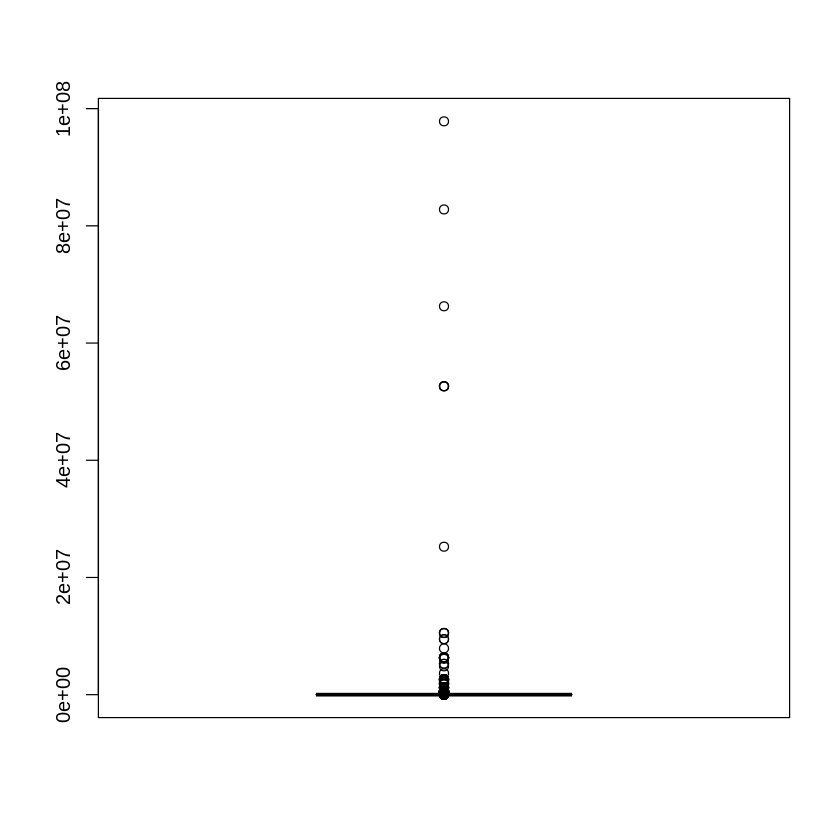

In [ ]:
boxplot(ufo$length_of_encounter_seconds)

In [ ]:
vector1=ufo$length_of_encounter_seconds
x <- vector1[!(vector1 > 60 | vector1 < 0)]
y <- vector1[!(vector1 > 3600 | vector1 < 60)]
z <- vector1[!(vector1 > 259200 | vector1 < 3600)]
w <- vector1[!(vector1 > 100000000 | vector1 < 259200)]

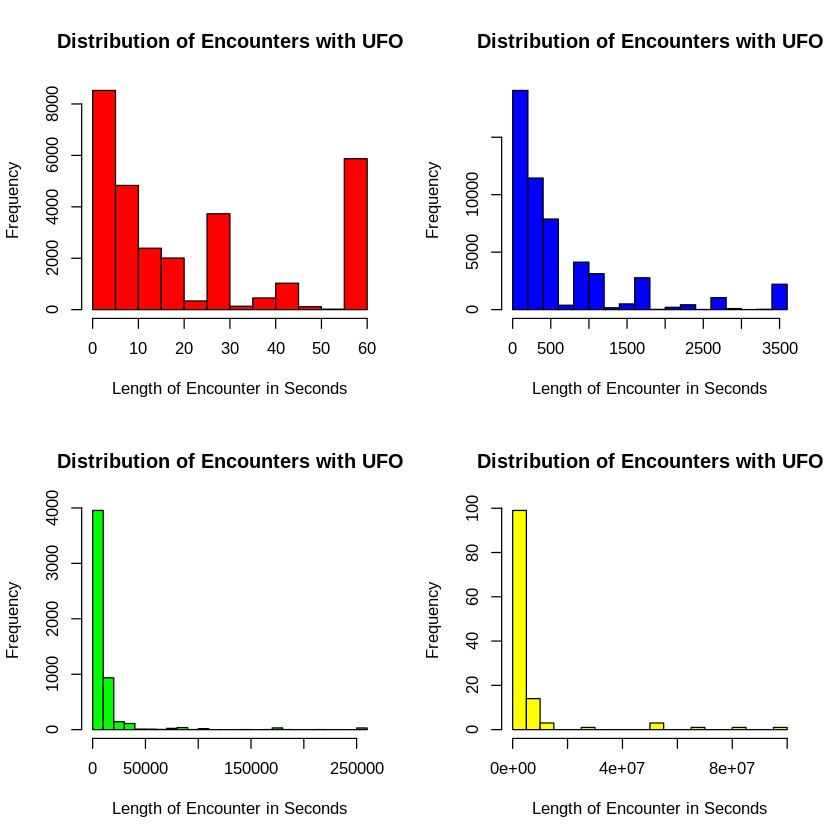

In [ ]:
par(mfrow = c(2, 2))

hist(x,
     main = "Distribution of Encounters with UFO",
     xlab = "Length of Encounter in Seconds",
     ylab = "Frequency",
     col = "red",
     breaks = 20)

hist(y,
     main = "Distribution of Encounters with UFO",
     xlab = "Length of Encounter in Seconds",
     ylab = "Frequency",
     col = "blue",
     breaks = 20)

hist(z,
     main = "Distribution of Encounters with UFO",
     xlab = "Length of Encounter in Seconds",
     ylab = "Frequency",
     col = "green",
     breaks = 20)

hist(w,
     main = "Distribution of Encounters with UFO",
     xlab = "Length of Encounter in Seconds",
     ylab = "Frequency",
     col = "yellow",
     breaks = 20)

In the above histograms, we have encounters from 0 to 60 seconds in red, 60 seconds to 1 hour in blue, 1 hour to 3 days in green, and finally over three days to the max entry, just over three years, in yellow.

By looking at these histograms, it is fairly clear to see that the `length_of_encounter_seconds` data is heavily skewed to the right, as the majoraty of observation are within the first two plots, the 0 seconds to one minute, and one minute to one hour plots.  What this could lead us to, is that are there differences in the mean length of encounter for some of the categorical variables, such as month vs month, country vs country, or season vs season?  We then decided to see if there was a difference from season to season for the mean length of encounter.

***Exploratory Data Analysis 2:*** Exploring the mean length of encounter in summer vs autumn.

If everything were easy, we would be very easily able to see a visual difference in the observed means by taking a boxplot comparing the `length_of_encounter_seconds` to the `Season` in a boxplot.  However, as seen below, the huge range of `length_of_encounter_seconds` causes issues in easily seeing a difference.

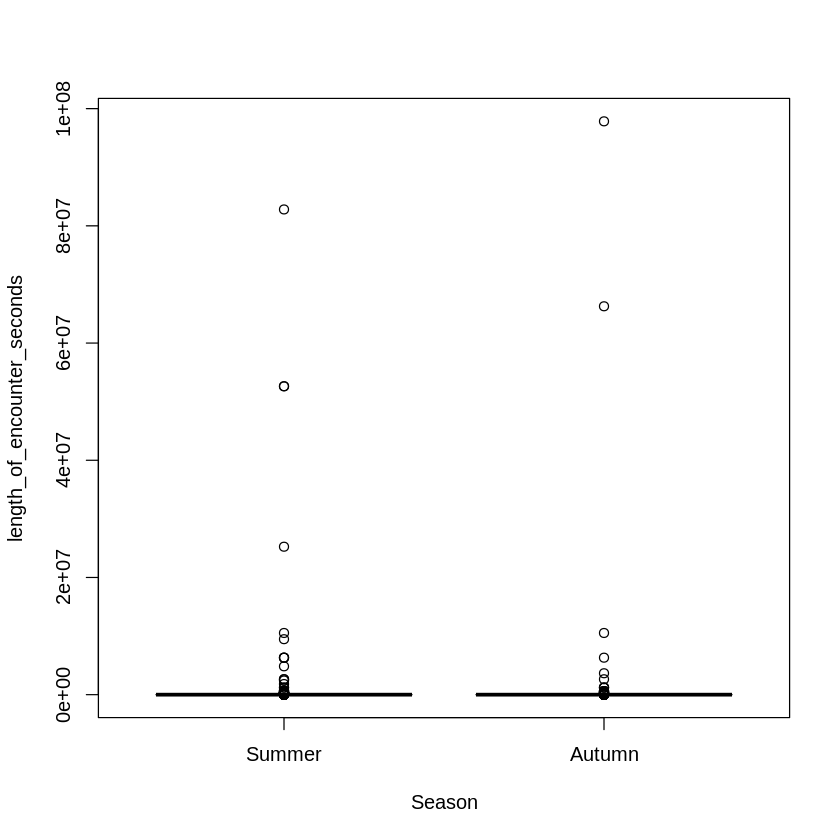

In [ ]:
boxplot(length_of_encounter_seconds ~ Season, data = ufo)

To circumvent this problem, we decided to do something very similar as what was done in the exploratory data analysis 1, and create 4 different histograms of each season of interest (summer and autumn) for different intervals of time.

In [ ]:
sum <- subset(ufo, Season == "Summer")
aut <- subset(ufo, Season == "Autumn")

In [ ]:
vector2= sum$length_of_encounter_seconds
x.sum <- vector2[!(vector2 > 60 | vector2 < 0)]
y.sum <- vector2[!(vector2 > 3600 | vector2 < 60)]
z.sum <- vector2[!(vector2 > 259200 | vector2 < 3600)]
w.sum <- vector2[!(vector2 > 100000000 | vector2 < 259200)]

In [ ]:
vector3= aut$length_of_encounter_seconds
x.aut <- vector3[!(vector3 > 60 | vector3 < 0)]
y.aut <- vector3[!(vector3 > 3600 | vector3 < 60)]
z.aut <- vector3[!(vector3 > 259200 | vector3 < 3600)]
w.aut <- vector3[!(vector3 > 100000000 | vector3 < 259200)]

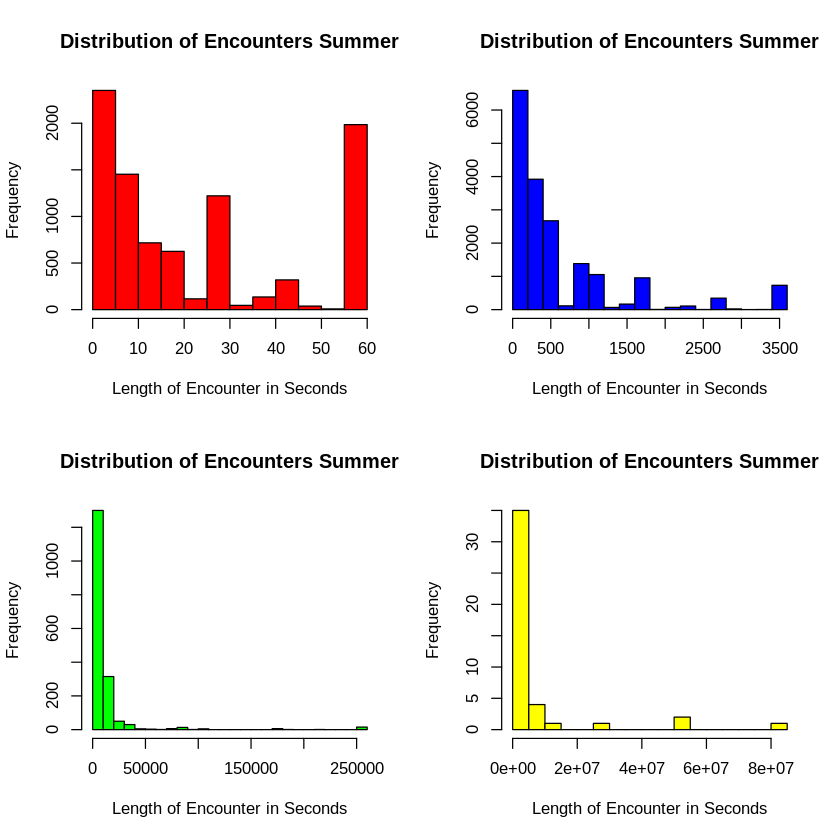

In [ ]:
par(mfrow = c(2, 2))

hist(x.sum,
     main = "Distribution of Encounters Summer",
     xlab = "Length of Encounter in Seconds",
     ylab = "Frequency",
     col = "red",
     breaks = 20)

hist(y.sum,
     main = "Distribution of Encounters Summer",
     xlab = "Length of Encounter in Seconds",
     ylab = "Frequency",
     col = "blue",
     breaks = 20)

hist(z.sum,
     main = "Distribution of Encounters Summer",
     xlab = "Length of Encounter in Seconds",
     ylab = "Frequency",
     col = "green",
     breaks = 20)

hist(w.sum,
     main = "Distribution of Encounters Summer",
     xlab = "Length of Encounter in Seconds",
     ylab = "Frequency",
     col = "yellow",
     breaks = 20)

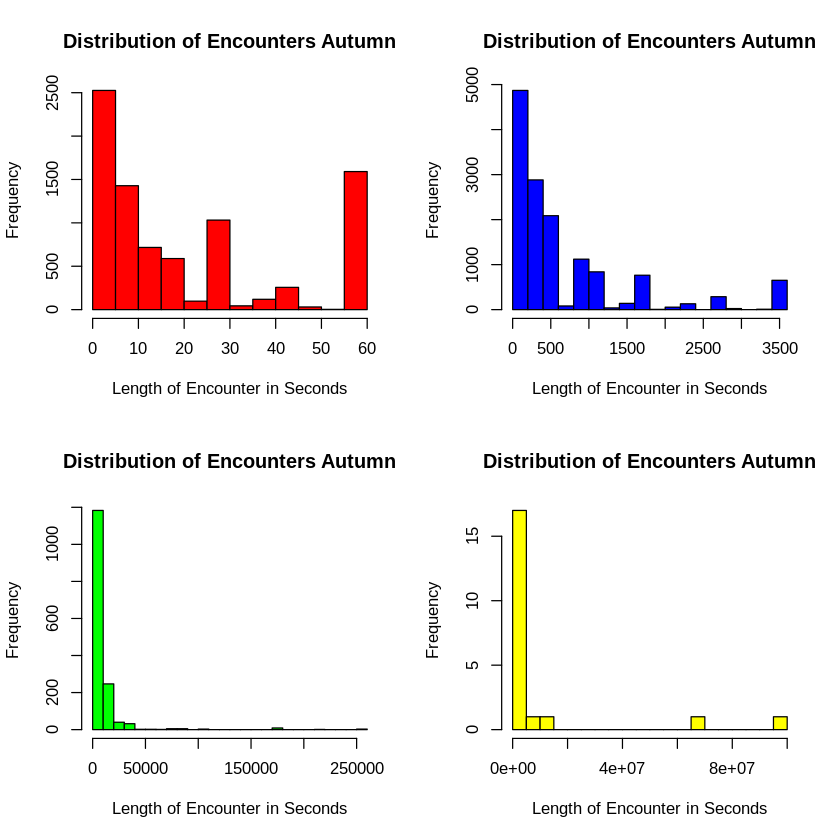

In [ ]:
par(mfrow = c(2, 2))

hist(x.aut,
     main = "Distribution of Encounters Autumn",
     xlab = "Length of Encounter in Seconds",
     ylab = "Frequency",
     col = "red",
     breaks = 20)

hist(y.aut,
     main = "Distribution of Encounters Autumn",
     xlab = "Length of Encounter in Seconds",
     ylab = "Frequency",
     col = "blue",
     breaks = 20)

hist(z.aut,
     main = "Distribution of Encounters Autumn",
     xlab = "Length of Encounter in Seconds",
     ylab = "Frequency",
     col = "green",
     breaks = 20)

hist(w.aut,
     main = "Distribution of Encounters Autumn",
     xlab = "Length of Encounter in Seconds",
     ylab = "Frequency",
     col = "yellow",
     breaks = 20)

As can be seen when comparing the two sets of the histograms, there appear to little to no differences in the distributions of ufo encounter length in one season compared to the other.  However if the axes are paid closer attention too, it looks as if there perhaps are more encounters overall for each distribution in the summer compared to autumn, but the signifigance of this difference is very shakey at best at an initial comparison such as this.  Based on this visual comparison, there may be very little chance of statistically significant difference of mean encounter length in summer vs autumn.

***Exploratory Data Analysis 3:*** expoloring difference in proportion of UFO shapes in Mexico vs the United States.

When wanting to see the difference of proportions of described UFO shape in one country vs another, first a table needs to be made comparing these two categorical variables.  From there, that table needs to be converted into a proportion table, ideally the proportion by column as to better see the difference.  Finally, use that prop table to make a stacked bar plot with a legend to visually see the comparison.

In [ ]:
ufo.table <- table(ufo$UFO_shape, ufo$Country)
ufo.col <- prop.table(ufo.table, 2)
ufo.col

          
              Mexico United States
  Light    0.4900000     0.3764836
  Triangle 0.1100000     0.1821014
  Circle   0.2300000     0.1697176
  Fireball 0.0900000     0.1433279
  Unknown  0.0800000     0.1283695

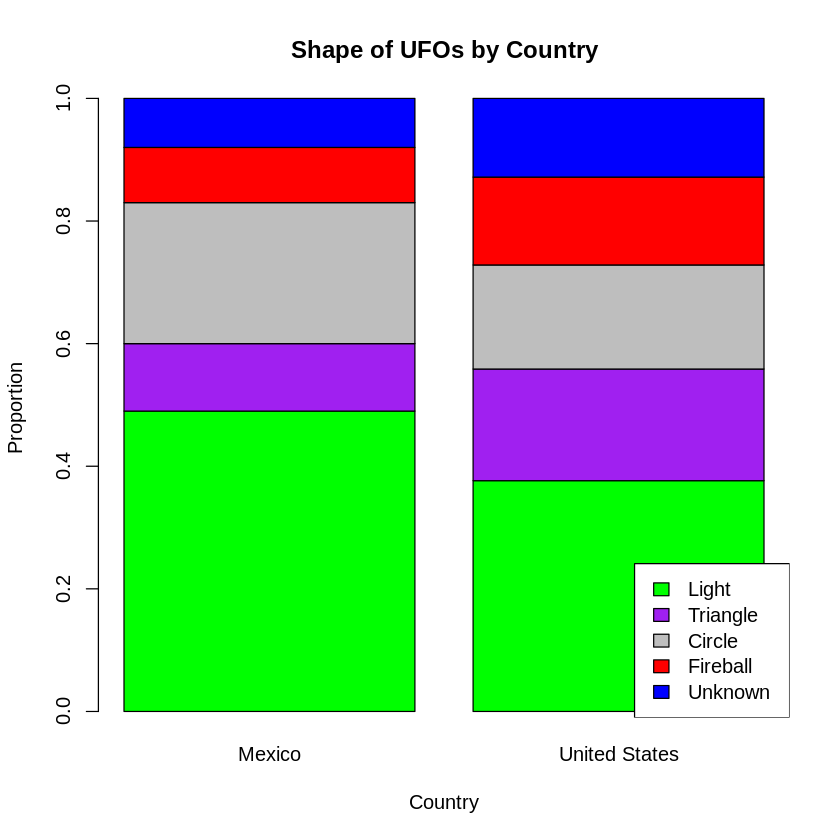

In [ ]:
my.colors <- c("green", "purple", "grey", "red", "blue")

barplot(ufo.col,
        main = "Shape of UFOs by Country",
        xlab = "Country",
        col = my.colors,
        ylab = "Proportion")

legend(x="bottomright",
       legend=rownames(ufo.col),
       fill = my.colors)

As can be seen in the above plot, there does in fact seem to be a fair difference in the proportions of described shapes of UFO in Mexico vs in the U.S., with Mexico seemingly having a higher proportion of UFOs described as "lights" compared to the states.  However, with the lights comparison in particular, the visual difference is not extreme, so there very much could be a chance that this observed difference in proportions is not statisitcally significant.

# Test for a Difference in Two Means

------------------------------------------------------------------------

**State your statistical question in words here.**

Then state the hypothesis for this test both in words and using appropriate notation.

- $H_0$: There is no difference in the average length of encounter ufo sightings in summer than the average length of ufo sightings in Autumn.
     - $μ_s-\mu_a=0$
- $H_a$: There is a difference in the average length of encounter ufo sighting in summer than the average length of ufo sighting in Autumn.
     - $\mu_s-\mu_a \neq 0$




## Permutation Test

---



In [ ]:
data.ufo <- read.csv("https://raw.githubusercontent.com/Diego150103/Project-Stat/main/ufo-sightings-transformed.csv")
summary(data.ufo)
ufo <- data.ufo[ , c("Season", "Country", "UFO_shape", "length_of_encounter_seconds")]
ufo$Season <- factor(ufo$Season)
ufo$UFO_shape <- factor(data.ufo$UFO_shape, levels = c("Light", "Triangle", "Circle", "Fireball", "Unknown"))
ufo$Country <- factor(data.ufo$Country, levels = c("Mexico", "United States", "Canada", "United Kingdom", "Australia"))
summary(ufo)

       X          Date_time         date_documented         Year     
 Min.   :    0   Length:80328       Length:80328       Min.   :1906  
 1st Qu.:20082   Class :character   Class :character   1st Qu.:2001  
 Median :40164   Mode  :character   Mode  :character   Median :2006  
 Mean   :40164                                         Mean   :2004  
 3rd Qu.:60245                                         3rd Qu.:2011  
 Max.   :80327                                         Max.   :2014  
     Month             Hour          Season          Country_Code      
 Min.   : 1.000   Min.   : 0.00   Length:80328       Length:80328      
 1st Qu.: 4.000   1st Qu.:10.00   Class :character   Class :character  
 Median : 7.000   Median :19.00   Mode  :character   Mode  :character  
 Mean   : 6.835   Mean   :15.53                                        
 3rd Qu.: 9.000   3rd Qu.:21.00                                        
 Max.   :12.000   Max.   :23.00                                        
   Cou

    Season                Country         UFO_shape    
 Autumn:21735   Mexico        :  225   Light   :16565  
 Spring:16268   United States :70878   Triangle: 7865  
 Summer:26307   Canada        : 3592   Circle  : 7607  
 Winter:16018   United Kingdom: 2348   Fireball: 6208  
                Australia     :  630   Unknown : 5584  
                NA's          : 2655   NA's    :36499  
 length_of_encounter_seconds
 Min.   :       0           
 1st Qu.:      30           
 Median :     180           
 Mean   :    9017           
 3rd Qu.:     600           
 Max.   :97836000           

In [ ]:
autumn <- subset(ufo, select = length_of_encounter_seconds, ## creating a vector containing the variable autumn
                    Season == "Autumn", drop = TRUE)
summer <- subset(ufo, select = length_of_encounter_seconds, ## creating a vector containing the variable summer
                    Season == "Summer", drop = TRUE)
pooled <- subset(ufo, select = length_of_encounter_seconds, ## creating a pooled vecto containing the variables autumn and summer
                    Season == "Autumn" | Season == "Summer", drop = TRUE)
total.summer <- length(summer)
total.autumn <- length(autumn)
total.pooled <- length(pooled)
n.min <- min(total.summer,total.autumn)
obs.seasons <- mean(summer)-mean(autumn)
obs.seasons

[1] 1595.319

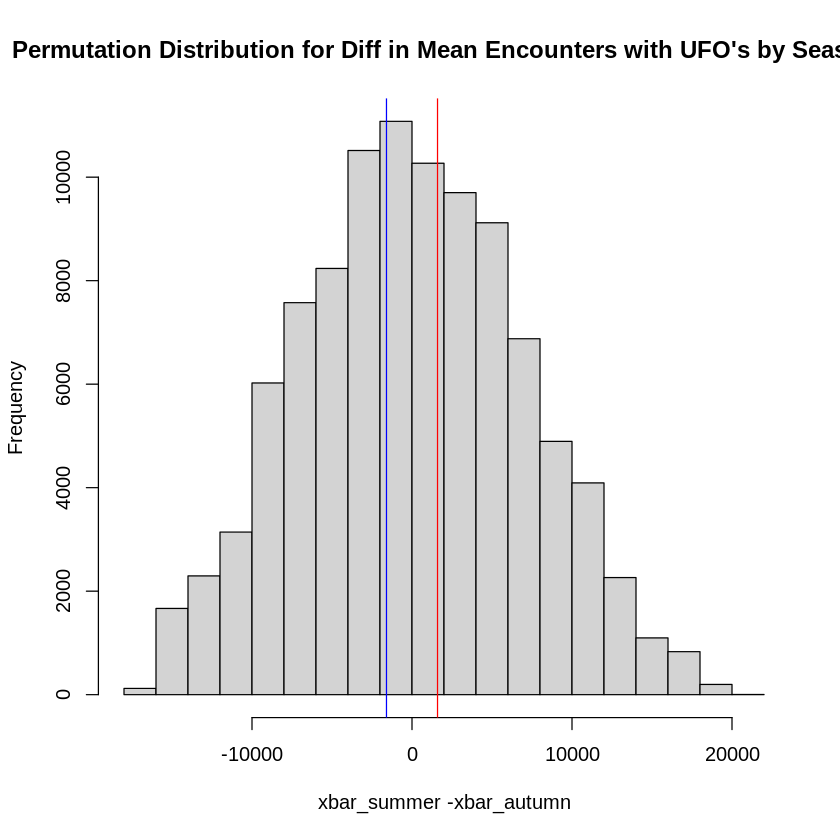

In [ ]:
mmdd <- 0528  # enter your birth month and date to set seed
set.seed(mmdd)


N <- 10^5 - 1  # Number of resamples we will create
result <- numeric(N)  # permutation sample differences stored here


for (i in 1:N)
{
  index <- sample(total.pooled, size = n.min , replace = FALSE)
  samp1 <- pooled[index]
  samp2 <- pooled[-index]
  result[i] <- mean(samp1)-mean(samp2)
}

# Creates histogram to display permutation distribution.
hist(result, xlab = "xbar_summer -xbar_autumn",
     main = "Permutation Distribution for Diff in Mean Encounters with UFO's by Season")

abline(v = c(-obs.seasons, obs.seasons), col = c("blue","red"))

In [ ]:
pvalue <- 2*(sum(result >= obs.seasons) + 1)/(N+1)
pvalue

[1] 0.82132

## Parametric Test

---


In [ ]:
point.est <- obs.seasons
tstar <- qt(.975, length(autumn) -1)
summer.sd <- sd(summer)
autumn.sd <- sd(autumn)
se <- sqrt( summer.sd^2 / length(summer) + autumn.sd^2 / length(autumn))
upper.diff <- point.est + tstar * se
lower.diff <- point.est - tstar * se
upper.diff
lower.diff
point.est

[1] 15357.91

[1] -12167.27

[1] 1595.319

In [ ]:
obs.seasons <- mean(summer)-mean(autumn)
sd.summer <- sd(summer)
sd.autumn <- sd(autumn)
se <- sqrt( sd.summer^2 /total.summer + sd.autumn^2 / total.autumn)
t.encounters <- (obs.seasons - 0) / se
t.encounters

[1] 0.2272059

In [ ]:
pval.encounters <- pt(t.encounters, n.min - 1)
pval.encounters
t.test(summer, autumn, alt = "two.sided")

[1] 0.5898671


	Welch Two Sample t-test

data:  summer and autumn
t = 0.22721, df = 43805, p-value = 0.8203
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12166.89  15357.52
sample estimates:
mean of x mean of y 
 11636.47  10041.15 


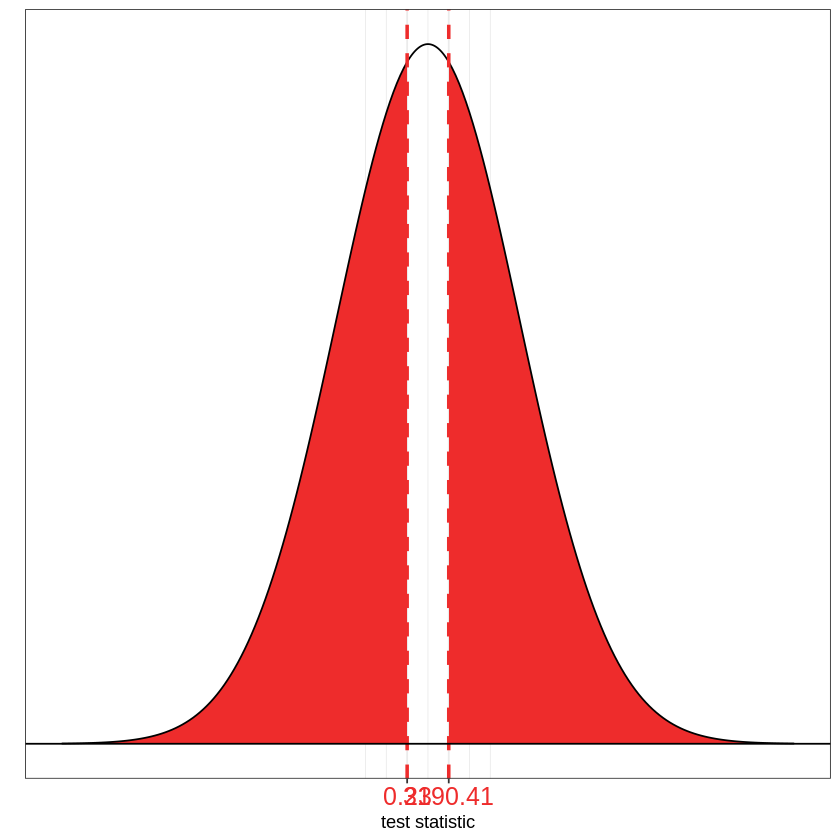

In [ ]:
null.mean <- mean(obs.seasons)  # mean of the null distribution
null.se <- se  # standard error of the null distribution
test.stat <- t.encounters  # test statistic
x.diff <- abs(null.mean - test.stat)
lower.x <- round(null.mean - x.diff, 2)
upper.x <- round(null.mean + x.diff, 2)

end.diff <- max(x.diff, 4*null.se)
xmax <- null.mean + end.diff
xmin <- null.mean - end.diff

library(ggplot2)
ggplot(NULL, aes(c(xmin, xmax))) +
  geom_area(stat = "function",   fun = dnorm,
            args = list(mean = null.mean, sd = null.se),
            color = "black", fill = NA,
            xlim = c(lower.x, upper.x)) +
  geom_area(stat = "function",   fun = dnorm,
            args = list(mean = null.mean, sd = null.se),
            color = "black", fill = "firebrick2",
            xlim = c(xmin, lower.x)) +
  geom_area(stat = "function",   fun = dnorm,
            args = list(mean = null.mean, sd = null.se),
            color = "black", fill = "firebrick2",
            xlim = c(upper.x, xmax)) +
  geom_vline(xintercept = c(lower.x, upper.x), linetype="dashed",
                color = "firebrick2", linewidth = 1) +
  labs(x = "test statistic", y = "") +
  scale_y_continuous(breaks = NULL) +
  scale_x_continuous(breaks=c(lower.x,  upper.x)) +
  geom_hline(yintercept=0) +
  theme_bw() +
  theme(axis.text.x=element_text(size=15, color = "firebrick2"))

## Comparison of Results

---


There was a approximitly a 23% difference in the p-values obtained in the permutation test and the parametric test. A difference in p-values is to be expected due to the parametric test being less accurate than the permutation test. Since both p-values are still greater than the significance level of 5%, the result for both are the same in that we fail to reject the null hypothesis.

# Test for a Difference in Two Proportions

------------------------------------------------------------------------

**State your statistical question in words here.**

Then state the hypothesis for this test both in words and using appropriate notation.

- $H_0$: The proportion of UFOs descibed as "light" shaped object in the US is the same as the proportion in Mexico $p_{US} - p_{mexico} = 0$

- $H_a$: The proportion of UFOs descibed as "light" shaped object in the US is different than the proportion in Mexico $p_{US} - p_{mexico} \neq 0$




## Permutation Test

---



In [ ]:
data.ufo <- read.csv("https://raw.githubusercontent.com/Diego150103/Project-Stat/main/ufo-sightings-transformed.csv")

In [ ]:
data.ufo$UFO_shape <- factor(data.ufo$UFO_shape, levels = c("Light", "Triangle", "Circle", "Fireball", "Unknown"))

# Subset the data
shapes <- subset(data.ufo, UFO_shape %in% c("Light", "Triangle", "Circle", "Fireball", "Unknown"))

In [ ]:
str(data.ufo)

'data.frame':	80328 obs. of  17 variables:
 $ X                          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Date_time                  : chr  "1949-10-10 20:30:00" "1949-10-10 21:00:00" "1955-10-10 17:00:00" "1956-10-10 21:00:00" ...
 $ date_documented            : chr  "4/27/2004" "12/16/2005" "1/21/2008" "1/17/2004" ...
 $ Year                       : int  1949 1949 1955 1956 1960 1961 1965 1965 1966 1966 ...
 $ Month                      : int  10 10 10 10 10 10 10 10 10 10 ...
 $ Hour                       : int  20 21 17 21 20 19 21 23 20 21 ...
 $ Season                     : chr  "Autumn" "Autumn" "Autumn" "Autumn" ...
 $ Country_Code               : chr  "USA" "USA" "GBR" "USA" ...
 $ Country                    : chr  "United States" "United States" "United Kingdom" "United States" ...
 $ Region                     : chr  "Texas" "Texas" "England" "Texas" ...
 $ Locale                     : chr  "San Marcos" "Bexar County" "Chester" "Edna" ...
 $ latitude                   : num

In [ ]:
levels <- c("Light", "Triangle", "Circle", "Fireball", "Unknown")

data.ufo2 <- subset(data.ufo, !is.na(UFO_shape) & UFO_shape %in% levels)

pooled <- subset(data.ufo2, select = UFO_shape,
                  Country == "Mexico" | Country == "United States",
                  drop = TRUE)

Mexico.UFO_shape <- subset(data.ufo2, select = UFO_shape, Country == "Mexico", drop = TRUE)

USA.UFO_shape <- subset(data.ufo2, select = UFO_shape, Country == "United States", drop = TRUE )

observed.stat <- mean(USA.UFO_shape == "Light") - mean(Mexico.UFO_shape == "Light")
observed.stat

[1] -0.1135164

In [ ]:
mmdd <- 1501  # enter your birth month and date to set seed
set.seed(mmdd)

total <- length(pooled)
m <- length(USA.UFO_shape)

N <- 10^5 - 1
result <- numeric(N)

for (i in 1:N)
{
  index <- sample(total, size = m, replace = FALSE)
  result[i] <- mean(pooled[index]=="Light") - mean(pooled[-index]=="Light")
}

ERROR: ignored

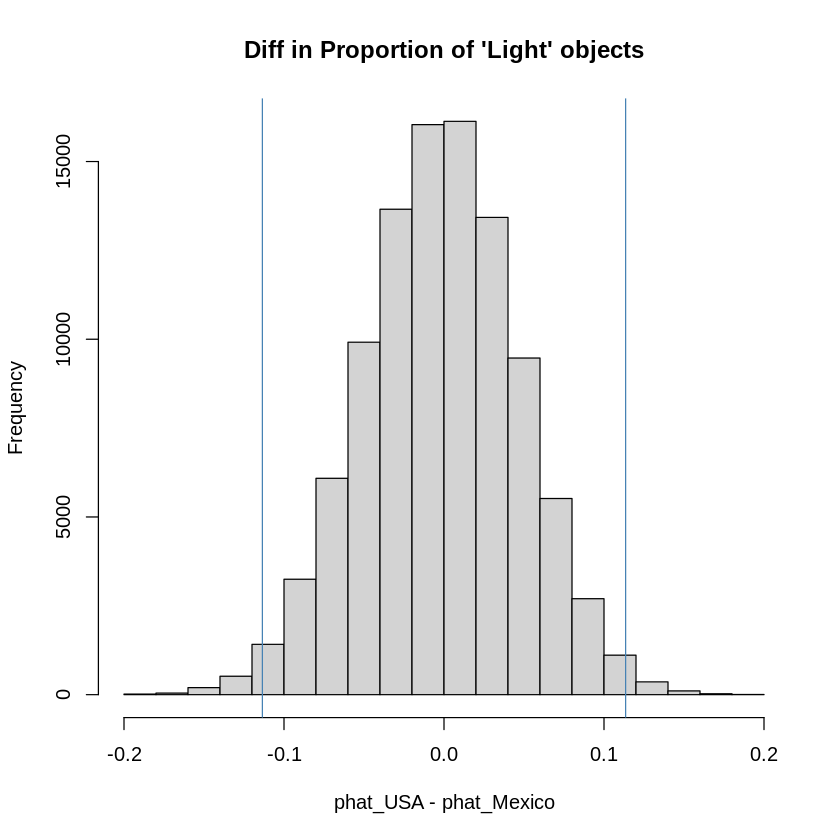

In [ ]:
hist(result, xlab = "phat_USA - phat_Mexico",
     main = "Diff in Proportion of 'Light' objects")
abline(v = c(observed.stat, -observed.stat), col = "steelblue")

# Create a polygon to fill the area in the right tail
polygon(c(observed.stat, x_limits[2], x_limits[2], observed.stat),
        c(0, 0, density(result)$counts[which( density(result)$mids > observed.stat )[1]], density(result)$counts[which( density(result)$mids > observed.stat )[1]]),
        col = "lightblue", border = NA)

# Create a polygon to fill the area in the left tail
polygon(c(-observed.stat, x_limits[1], x_limits[1], -observed.stat),
        c(0, 0, density(result)$counts[which( density(result)$mids < -observed.stat )[1]], density(result)$counts[which( density(result)$mids < -observed.stat )[1]]),
        col = "lightblue", border = NA)

In [ ]:
pvalue_prop <- 2*((sum(result <= observed.stat) + 1)/(N+1))
pvalue_prop

[1] 0.02694

## Parametric Test

---


In [ ]:
x.USA <- sum(USA.UFO_shape == "Light")
n.USA <- length(USA.UFO_shape)

x.Mex <- sum(Mexico.UFO_shape == "Light")
n.Mex <- length(Mexico.UFO_shape)

p.pooled <- (x.USA + x.Mex) / (n.Mex + n.USA)
se.shape <- sqrt( p.pooled * (1 - p.pooled) * (1 / n.USA + 1 / n.Mex) )

p.pooled
se.shape

[1] 0.3767751

[1] 0.04852012

In [ ]:
p.USA <- mean(USA.UFO_shape == "Light")
p.Mex <- mean(Mexico.UFO_shape == "Light")

obs.diff.shapes <- p.USA - p.Mex

p.USA
p.Mex
obs.diff.shapes

[1] 0.3764836

[1] 0.49

[1] -0.1135164

In [ ]:
z.shape <- (obs.diff.shapes - 0) / se.shape
z.shape

[1] -2.339574

In [ ]:
2*(pnorm(z.shape, 0 , 1))

[1] 0.01930577

In [ ]:
prop.test(c(x.USA, x.Mex), c(n.USA, n.Mex), alt = "two.sided", correct = FALSE)


	2-sample test for equality of proportions without continuity correction

data:  c(x.USA, x.Mex) out of c(n.USA, n.Mex)
X-squared = 5.4736, df = 1, p-value = 0.01931
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.21161339 -0.01541938
sample estimates:
   prop 1    prop 2 
0.3764836 0.4900000 


In [ ]:
null.mean <- 0  # mean of the null distribution
null.se <- se.shape  # standard error of the null distribution
test.stat <- obs.diff.shapes  # test statistic

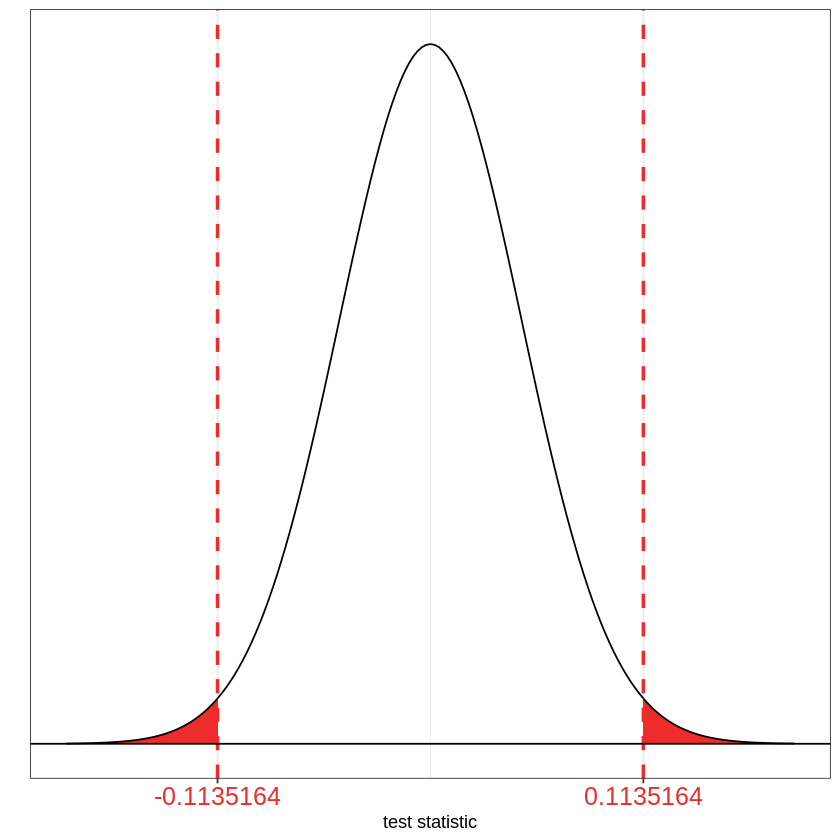

In [ ]:
library(ggplot2)

x.diff <- abs(null.mean - test.stat)
lower.x <- null.mean - x.diff
upper.x <- null.mean + x.diff

end.diff <- max(x.diff, 4*null.se)
xmax <- null.mean + end.diff
xmin <- null.mean - end.diff


ggplot(NULL, aes(c(xmin, xmax))) +
  geom_area(stat = "function",   fun = dnorm,
            args = list(mean = null.mean, sd = null.se),
            color = "black", fill = NA,
            xlim = c(lower.x, upper.x)) +
  geom_area(stat = "function",   fun = dnorm,
            args = list(mean = null.mean, sd = null.se),
            color = "black", fill = "firebrick2",
            xlim = c(xmin, lower.x)) +
  geom_area(stat = "function",   fun = dnorm,
            args = list(mean = null.mean, sd = null.se),
            color = "black", fill = "firebrick2",
            xlim = c(upper.x, xmax)) +
  geom_vline(xintercept = c(lower.x, upper.x), linetype="dashed",
                color = "firebrick2", linewidth = 1) +
  labs(x = "test statistic", y = "") +
  scale_y_continuous(breaks = NULL) +
  scale_x_continuous(breaks=c(lower.x,  upper.x)) +
  geom_hline(yintercept=0) +
  theme_bw() +
  theme(axis.text.x=element_text(size=15, color = "firebrick2"))

## Comparison of Results

---


We obtained similar results for the p-values between the permutation and the parametric tests. In the case of the Parametric tests, we are using less accurate information since we are accepting some error in our calculations. On the other hand, the permutation test is more accurate since we are simulating the different permutations of the samples, but the values are similar and do not affect our conclusions using a significance level of $\alpha = 0.05$. Both p-values are good enough to take into consideration on our project.

# Conclusion

---

Summarize any interesting findings from your exploratory data anlaysis and test results. What conclusions (if any) were you able to make? If your results are inconclusive, explain how you might modify your work. What additional questions about the data might be worth exploring for future work?

There is a 82.1% chance of getting a observed difference in the mean encounters with UFO's in Summer and Autumn lasting approximitly 1595.32 seconds if there was no difference in the mean encounters with UFO by season.

Since the P-value is approximately $0.821$ which is greater than the significance level $\alpha = 0.05$, the test is not statistically significant.

This means the test is inconclusive we cannot reject the null hypothesis.

We cannot be sure whether or not there the mean ecounters with UFO in the Summer is different than the mean encounters of UFO in Autumn.


Since the p-value is approximtily $58.99$%, it follows that with a significance level of $5$%, the result of the test is not statistically significant. This means the test is incoclusive, and we fail to reject the null hypothesis.

There is a $1.93\%$ chance of getting an observed sample difference in the sample proportions of $-0.1135$ given that the null hypothesis is true, this would mean that it is not likely to get the sample we observed assuming there is no difference in the proportions of the 'Light' objects in both countries.

<br>

Since the p-value is approximately $0.0193$ is less than the significance level $\alpha = 0.05$, the test is statistically significant.
This means that there is enough evidence to reject $H_0$ and we accept $H_0$ meaning that there is a difference in the proportions of the ‘Light' UFO shapes between Mexico and the US.


If we were to explore this data any further it could perhaps be interesting to explore some of ths unused variables, such as hour at which these encounters take place, alongside comparing many more different countries besides just the US and Mexico, as it would be very interesting to see if cultural differences lead to different statisitcs for UFO encounters.